In [6]:
import numpy as np
import pandas as pd
from fbprophet import Prophet

In [22]:
df = pd.read_csv("./avocado.csv")

In [33]:
df.groupby("type").mean()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
type,,,,,,,,,,,
conventional,24.236686,1.092012,3.373504e+07,1.201098e+07,1.161486e+07,918703.964142,9.190493e+06,7.000174e+06,2.063387e+06,126931.14645,2016.147929


In [46]:
df = df[(df.type == "conventional") & (df.region == "TotalUS")]
df["Date"] = pd.to_datetime(df["Date"])
data = df[["Date", "AveragePrice"]].reset_index(drop=True)
data = data.rename(columns = {"Date":"ds","AveragePrice":"y"})
data.head()

,ds,y
0,2015-12-27,0.95
1,2015-12-20,0.98
2,2015-12-13,0.93
3,2015-12-06,0.89
4,2015-11-29,0.99


<AxesSubplot:xlabel='ds'>

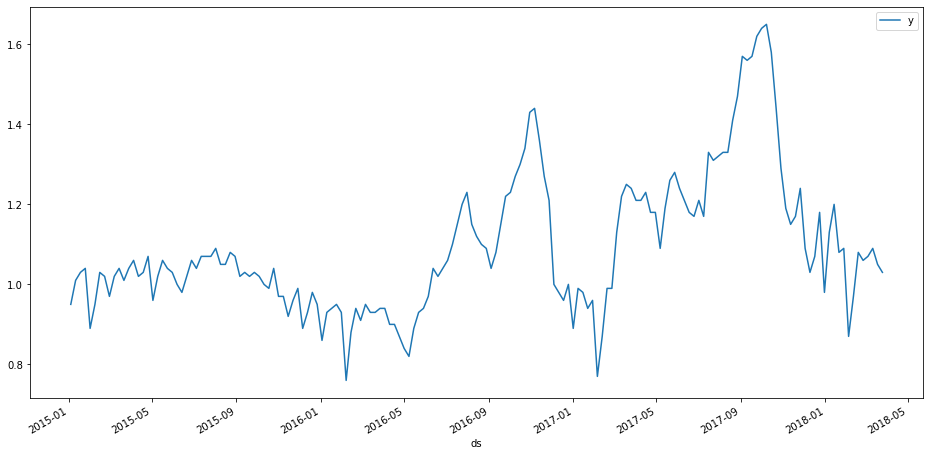

In [42]:
data.plot(x="ds", y="y", figsize=(16,8))

In [29]:
model = Prophet()
model.fit(data)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
forecast.tail()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
529,2019-03-21,1.201094,1.016638,1.275878,1.141804,1.266158,-0.062189,-0.062189,-0.062189,-0.062189,-0.062189,-0.062189,0.0,0.0,0.0,1.138906
530,2019-03-22,1.201036,1.010910,1.274875,1.141600,1.266484,-0.060667,-0.060667,-0.060667,-0.060667,-0.060667,-0.060667,0.0,0.0,0.0,1.140369
531,2019-03-23,1.200977,1.015730,1.264709,1.141322,1.266810,-0.058660,-0.058660,-0.058660,-0.058660,-0.058660,-0.058660,0.0,0.0,0.0,1.142318
532,2019-03-24,1.200919,1.010513,1.264074,1.140929,1.267136,-0.056183,-0.056183,-0.056183,-0.056183,-0.056183,-0.056183,0.0,0.0,0.0,1.144736
533,2019-03-25,1.200860,1.011817,1.287430,1.140661,1.267436,-0.053268,-0.053268,-0.053268,-0.053268,-0.053268,-0.053268,0.0,0.0,0.0,1.147592


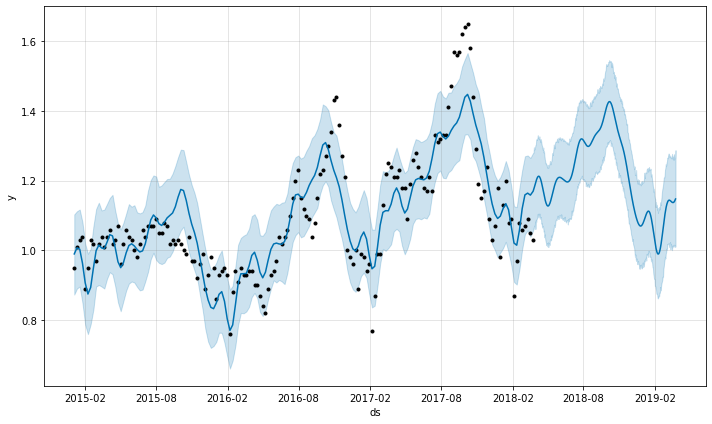

In [47]:
fig1 = model.plot(forecast)

## 파란선은 추세선
## 파란영역은 트랜드

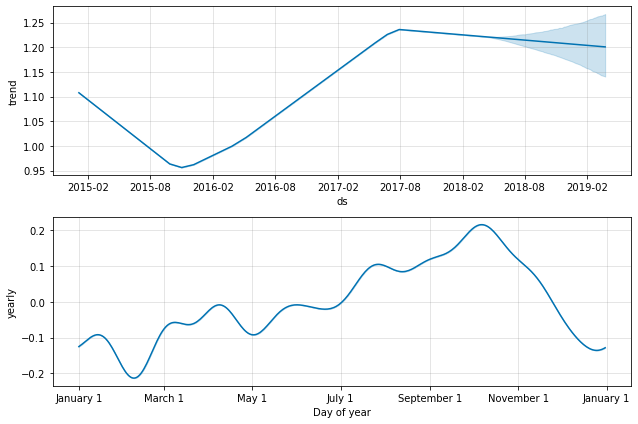

In [38]:
fig2 = model.plot_components(forecast)

## 학생데이터 실습

In [227]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("dark_background")
sns.set(style="darkgrid", palette="bright", font_scale=1.5)

stu_per = pd.read_csv("StudentsPerformance.csv")

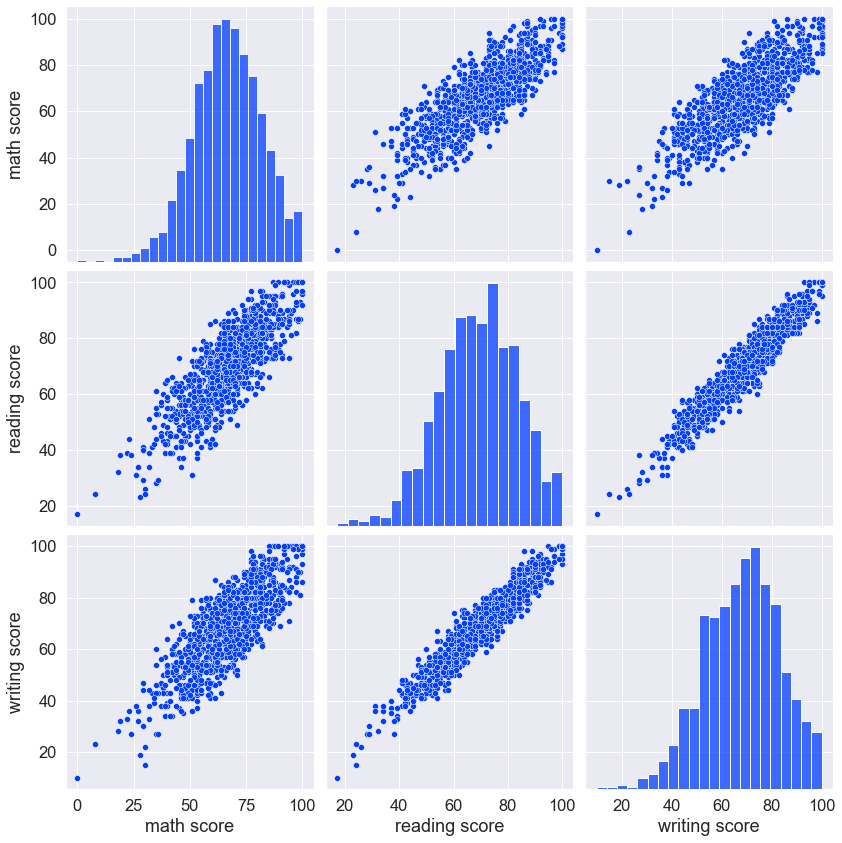

In [57]:
sns.pairplot(stu_per[["math score", "reading score", "writing score"]], height=4)

In [228]:
def average_score(stu_per):
    return (stu_per["math score"]+stu_per["reading score"]+stu_per["writing score"])/3

stu_per["average score"] = stu_per.apply(average_score, axis=1)

Text(0.5, 1.0, 'average score')

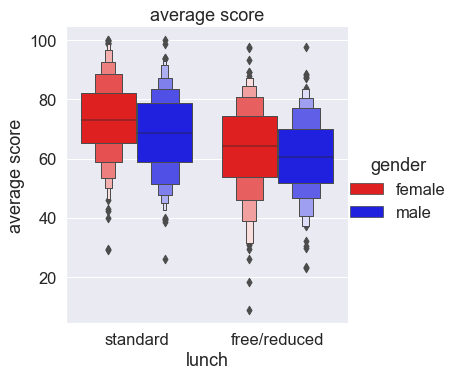

In [100]:
sns.catplot(x='lunch', y='average score', hue="gender",kind="boxen", data=stu_per, height=5, palette=sns.color_palette(["red","blue"]))
plt.title("average score")

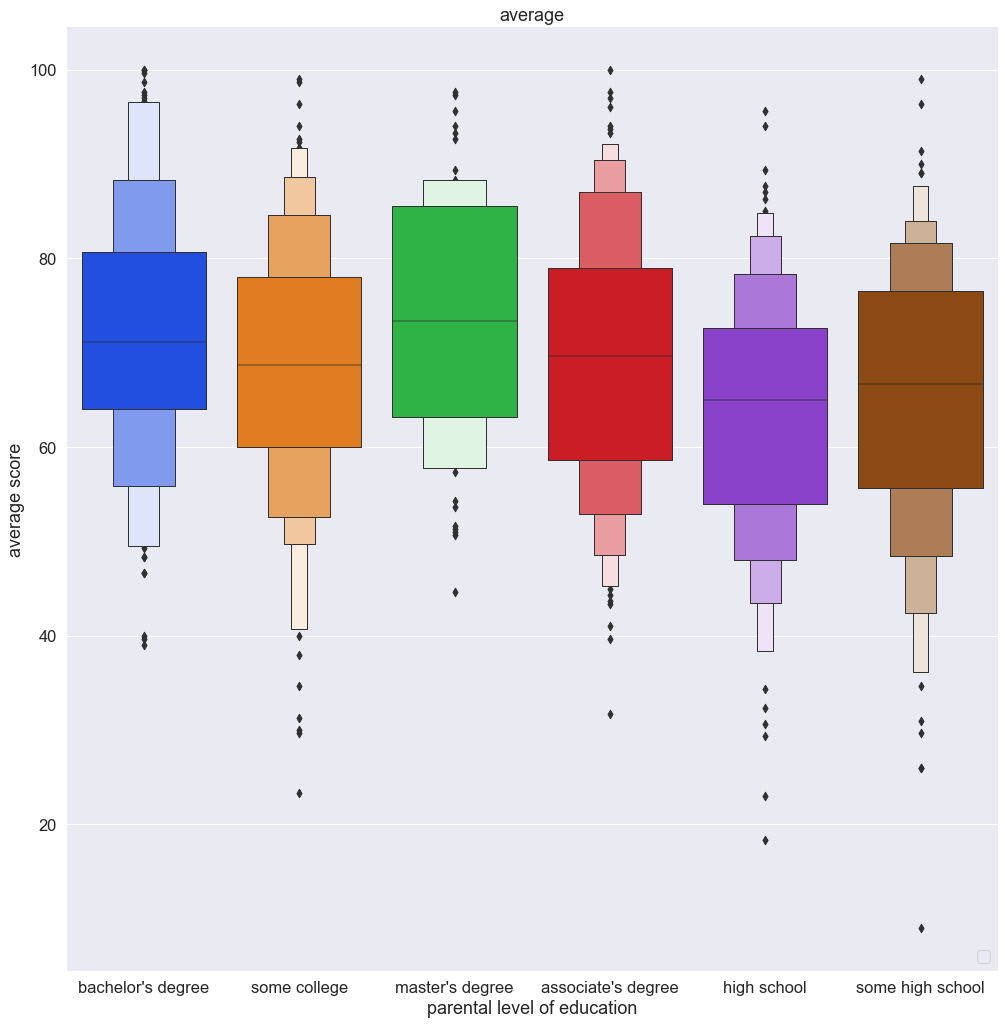

In [75]:
sns.catplot(x='parental level of education', y='average score',kind="boxen", data=stu_per, height=14)
plt.title("average")
plt.legend(loc="lower right")

## 학습시키기

In [16]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

# 기본데이터 준비

df = pd.read_csv("StudentsPerformance.csv")
y_target = df["writing score"]
df.drop(columns=["writing score"], inplace=True)
x_data = pd.get_dummies(df)

### LR

In [8]:
lr = LinearRegression()
neg_mse_scores = cross_val_score(lr, x_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)


print("5 folds의 개별 Negative MSE scores: ", np.round(neg_mse_scores, 2))
print("5 folds의 개별 RMSE scores: ", np.round(rmse_scores, 2))
print("5 folds의 평균 RMSE: {0:.3f}".format(avg_rmse))

5 folds의 개별 Negative MSE scores:  [-13.37 -12.73 -11.62 -10.9  -13.66]
5 folds의 개별 RMSE scores:  [3.66 3.57 3.41 3.3  3.7 ]
5 folds의 평균 RMSE: 3.526


### Ridge

In [36]:
alphas = [x for x in np.linspace(0, 100, 5)]
avg_rmse = []

# alphas list 값을 iteration하면서 alpha에 따른 평균 rmse 구함.
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    
    # cross_val_score를 이용하여 5 fold의 평균 rmse 계산
    neg_mse_scores = cross_val_score(ridge, x_data, y_target, scoring="neg_mean_squared_error", cv=5)
    avg_rmse.append(np.mean(np.sqrt(-1*neg_mse_scores)))
    
print("alpha {0:.1f}일 때 5 folds의 평균 RMSE: {1:.3f}".format(alphas[avg_rmse.index(min(avg_rmse))], min(avg_rmse)))

alpha 25.0일 때 5 folds의 평균 RMSE: 3.537


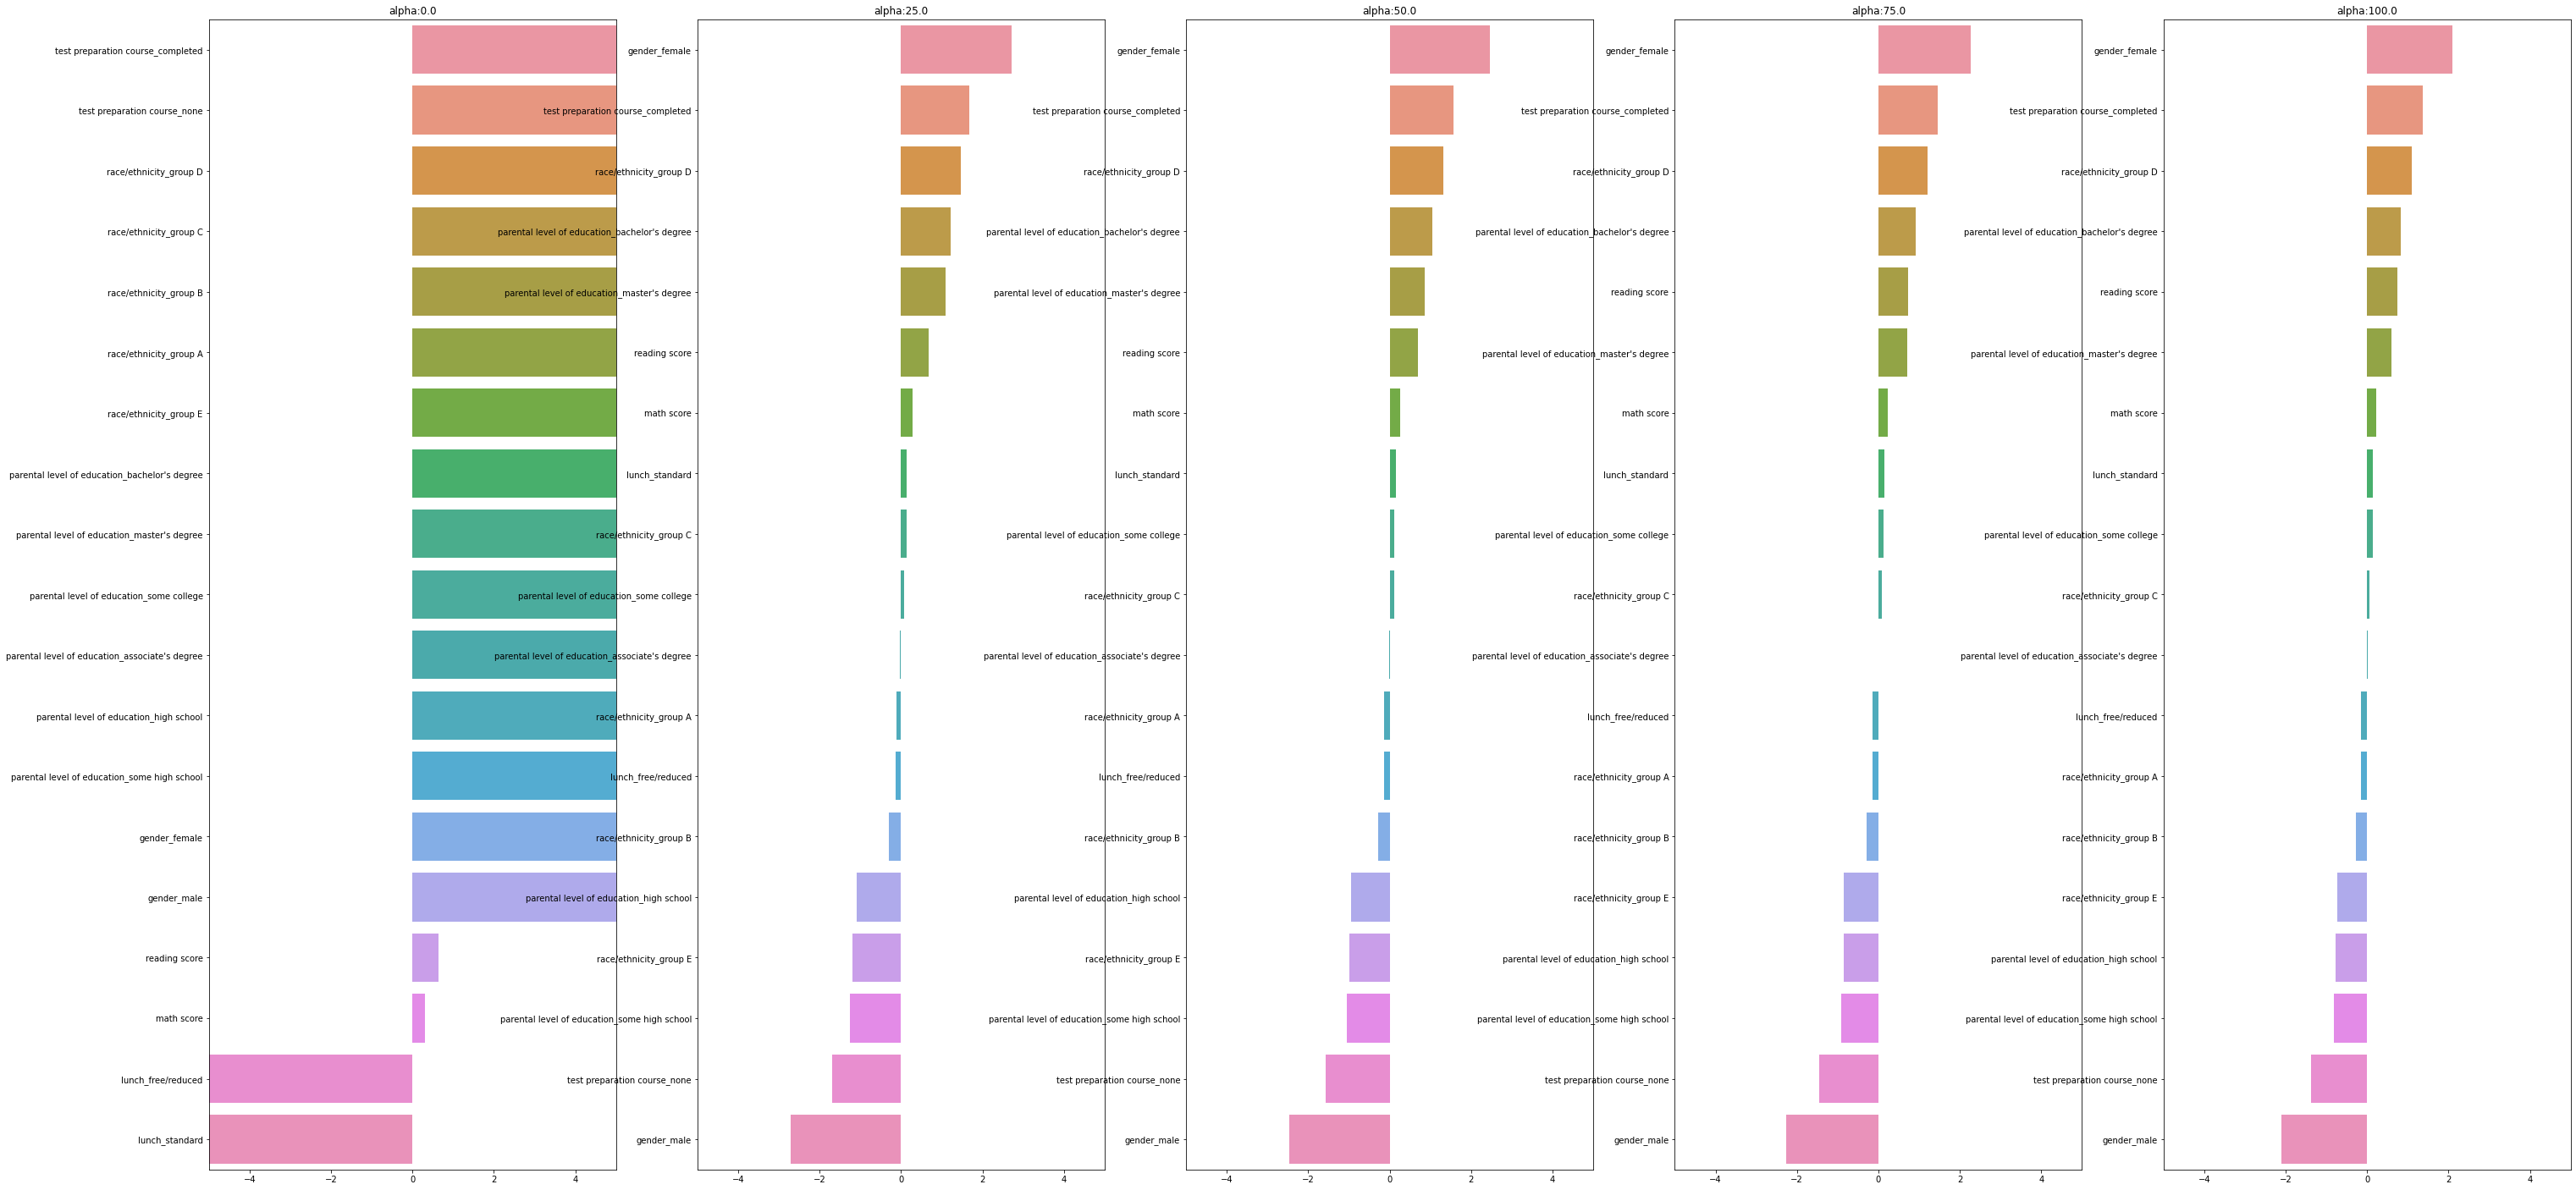

In [12]:
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성  
fig , axs = plt.subplots(figsize=(50,25) , nrows=1 , ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성  
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos , alpha in enumerate(alphas) :
    ridge = Ridge(alpha = alpha)
    ridge.fit(x_data , y_target)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.  
    coeff = pd.Series(data=ridge.coef_ , index=x_data.columns )
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-5,5)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

In [13]:
## alpha 값에 따른 컬럼별 회귀계수 출력

ridge_alphas=[x for x in np.linspace(0, 200, 5)]
sort_column = "alpha:"+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0.0,alpha:25.0,alpha:50.0,alpha:75.0,alpha:100.0
test preparation course_completed,1.294422e+14,1.683761,1.563715,1.461673,1.373401
test preparation course_none,1.294422e+14,-1.683761,-1.563715,-1.461673,-1.373401
race/ethnicity_group D,7.830408e+13,1.468644,1.323126,1.202371,1.101090
race/ethnicity_group C,7.830408e+13,0.130343,0.102794,0.081814,0.065683
race/ethnicity_group B,7.830408e+13,-0.293368,-0.290178,-0.281781,-0.271178
race/ethnicity_group A,7.830408e+13,-0.108199,-0.138339,-0.151118,-0.155369
race/ethnicity_group E,7.830408e+13,-1.197420,-0.997404,-0.851285,-0.740225
parental level of education_bachelor's degree,1.976215e+13,1.209989,1.049527,0.923833,0.823723
parental level of education_master's degree,1.976215e+13,1.095240,0.858758,0.706113,0.599357
parental level of education_some college,1.976215e+13,0.070959,0.110682,0.131689,0.142693


### Lasso

In [37]:
alphas = [0.07, 0.1, 0.5, 1, 3]
avg_rmse = []
# alphas list 값을 iteration하면서 alpha에 따른 평균 rmse 구함.
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    
    # cross_val_score를 이용하여 5 fold의 평균 rmse 계산
    neg_mse_scores = cross_val_score(lasso, x_data, y_target, scoring="neg_mean_squared_error", cv=5)
    avg_rmse.append(np.mean(np.sqrt(-1*neg_mse_scores)))
    
print("alpha {0:.1f}일 때 5 folds의 평균 RMSE: {1:.3f}".format(alphas[avg_rmse.index(min(avg_rmse))], min(avg_rmse)))

alpha 0.1일 때 5 folds의 평균 RMSE: 3.555


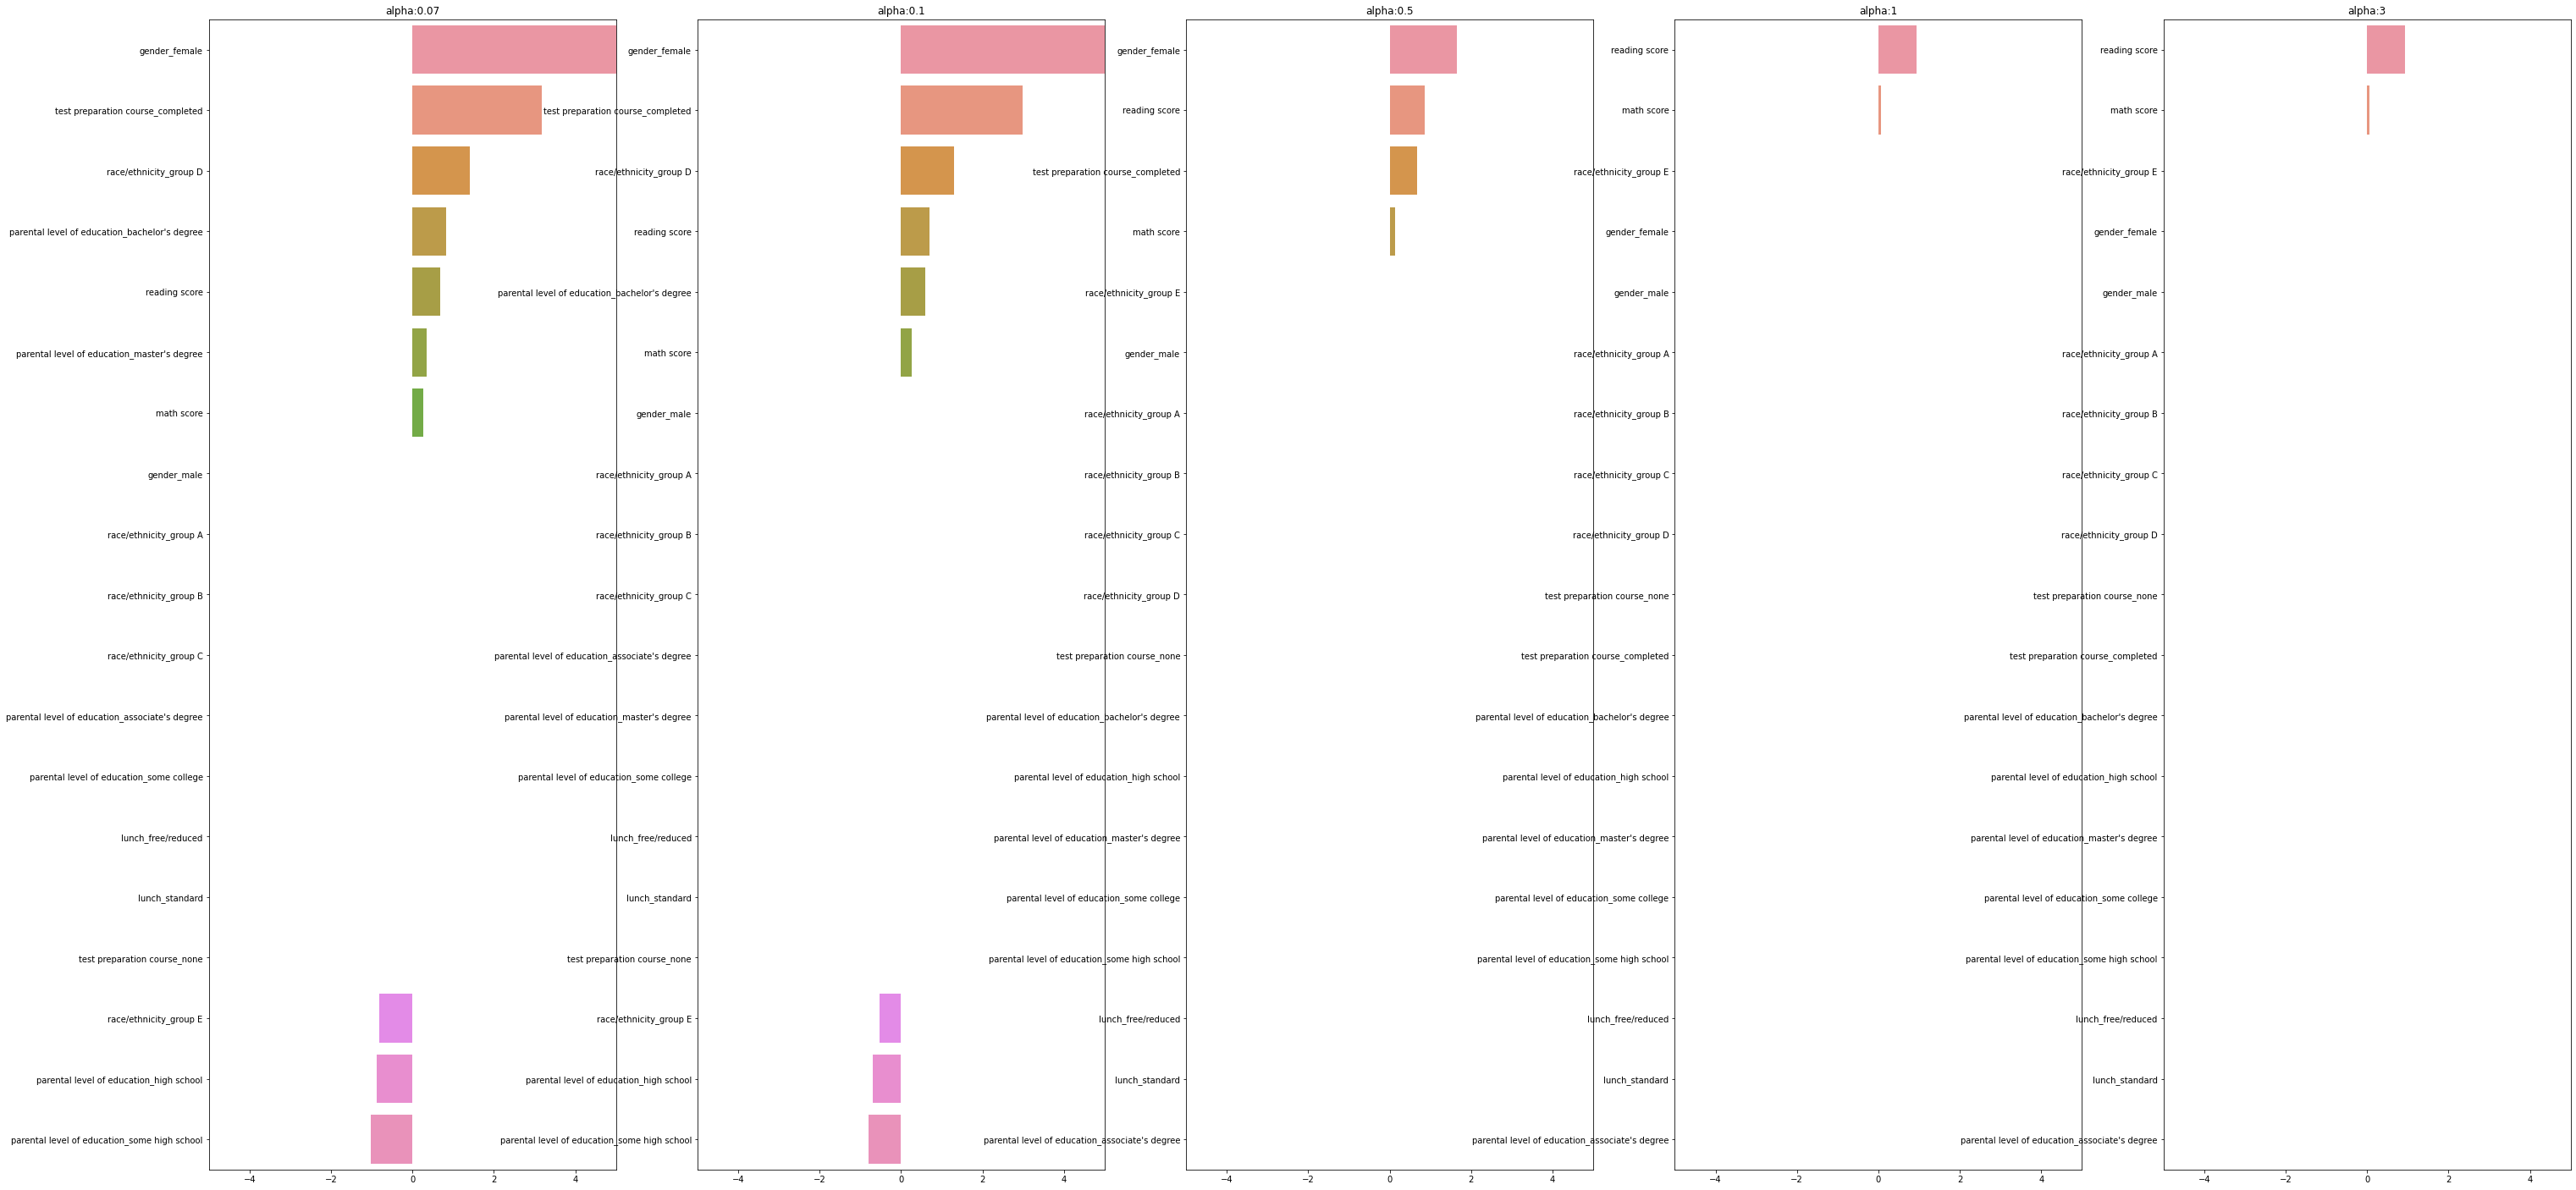

In [38]:
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성  
fig , axs = plt.subplots(figsize=(50,25) , nrows=1 , ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성  
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos , alpha in enumerate(alphas) :
    lasso = Lasso(alpha = alpha)
    lasso.fit(x_data , y_target)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.  
    coeff = pd.Series(data=lasso.coef_ , index=x_data.columns )
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-5,5)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

In [39]:
## alpha 값에 따른 컬럼별 회귀계수 출력
sort_column = "alpha:"+str(alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
gender_female,5.372076e+00,5.081600e+00,1.643007,0.000000,0.000000
test preparation course_completed,3.173643e+00,2.975528e+00,0.675610,0.000000,0.000000
race/ethnicity_group D,1.408864e+00,1.303089e+00,0.000000,0.000000,0.000000
parental level of education_bachelor's degree,8.351359e-01,5.913771e-01,0.000000,0.000000,0.000000
reading score,6.848375e-01,7.015550e-01,0.863852,0.933471,0.927431
parental level of education_master's degree,3.394961e-01,0.000000e+00,0.000000,0.000000,0.000000
math score,2.719406e-01,2.587201e-01,0.127452,0.065204,0.061256
lunch_standard,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
lunch_free/reduced,-0.000000e+00,-0.000000e+00,-0.000000,-0.000000,-0.000000
parental level of education_some college,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000


### Elasticnet

In [47]:
alphas = [0.07, 0.1, 0.5, 1, 3]
avg_rmse = []
# alphas list 값을 iteration하면서 alpha에 따른 평균 rmse 구함.
for alpha in alphas:
    EN = ElasticNet(alpha=alpha, l1_ratio=0.7)
    
    # cross_val_score를 이용하여 5 fold의 평균 rmse 계산
    neg_mse_scores = cross_val_score(EN, x_data, y_target, scoring="neg_mean_squared_error", cv=5)
    avg_rmse.append(np.mean(np.sqrt(-1*neg_mse_scores)))
    
    print("alpha {0:.1f}일 때 5 folds의 평균 RMSE: {1:.3f}".format(alphas[avg_rmse.index(min(avg_rmse))], min(avg_rmse)))

alpha 0.1일 때 5 folds의 평균 RMSE: 3.559
alpha 0.1일 때 5 folds의 평균 RMSE: 3.559
alpha 0.1일 때 5 folds의 평균 RMSE: 3.559
alpha 0.1일 때 5 folds의 평균 RMSE: 3.559
alpha 0.1일 때 5 folds의 평균 RMSE: 3.559


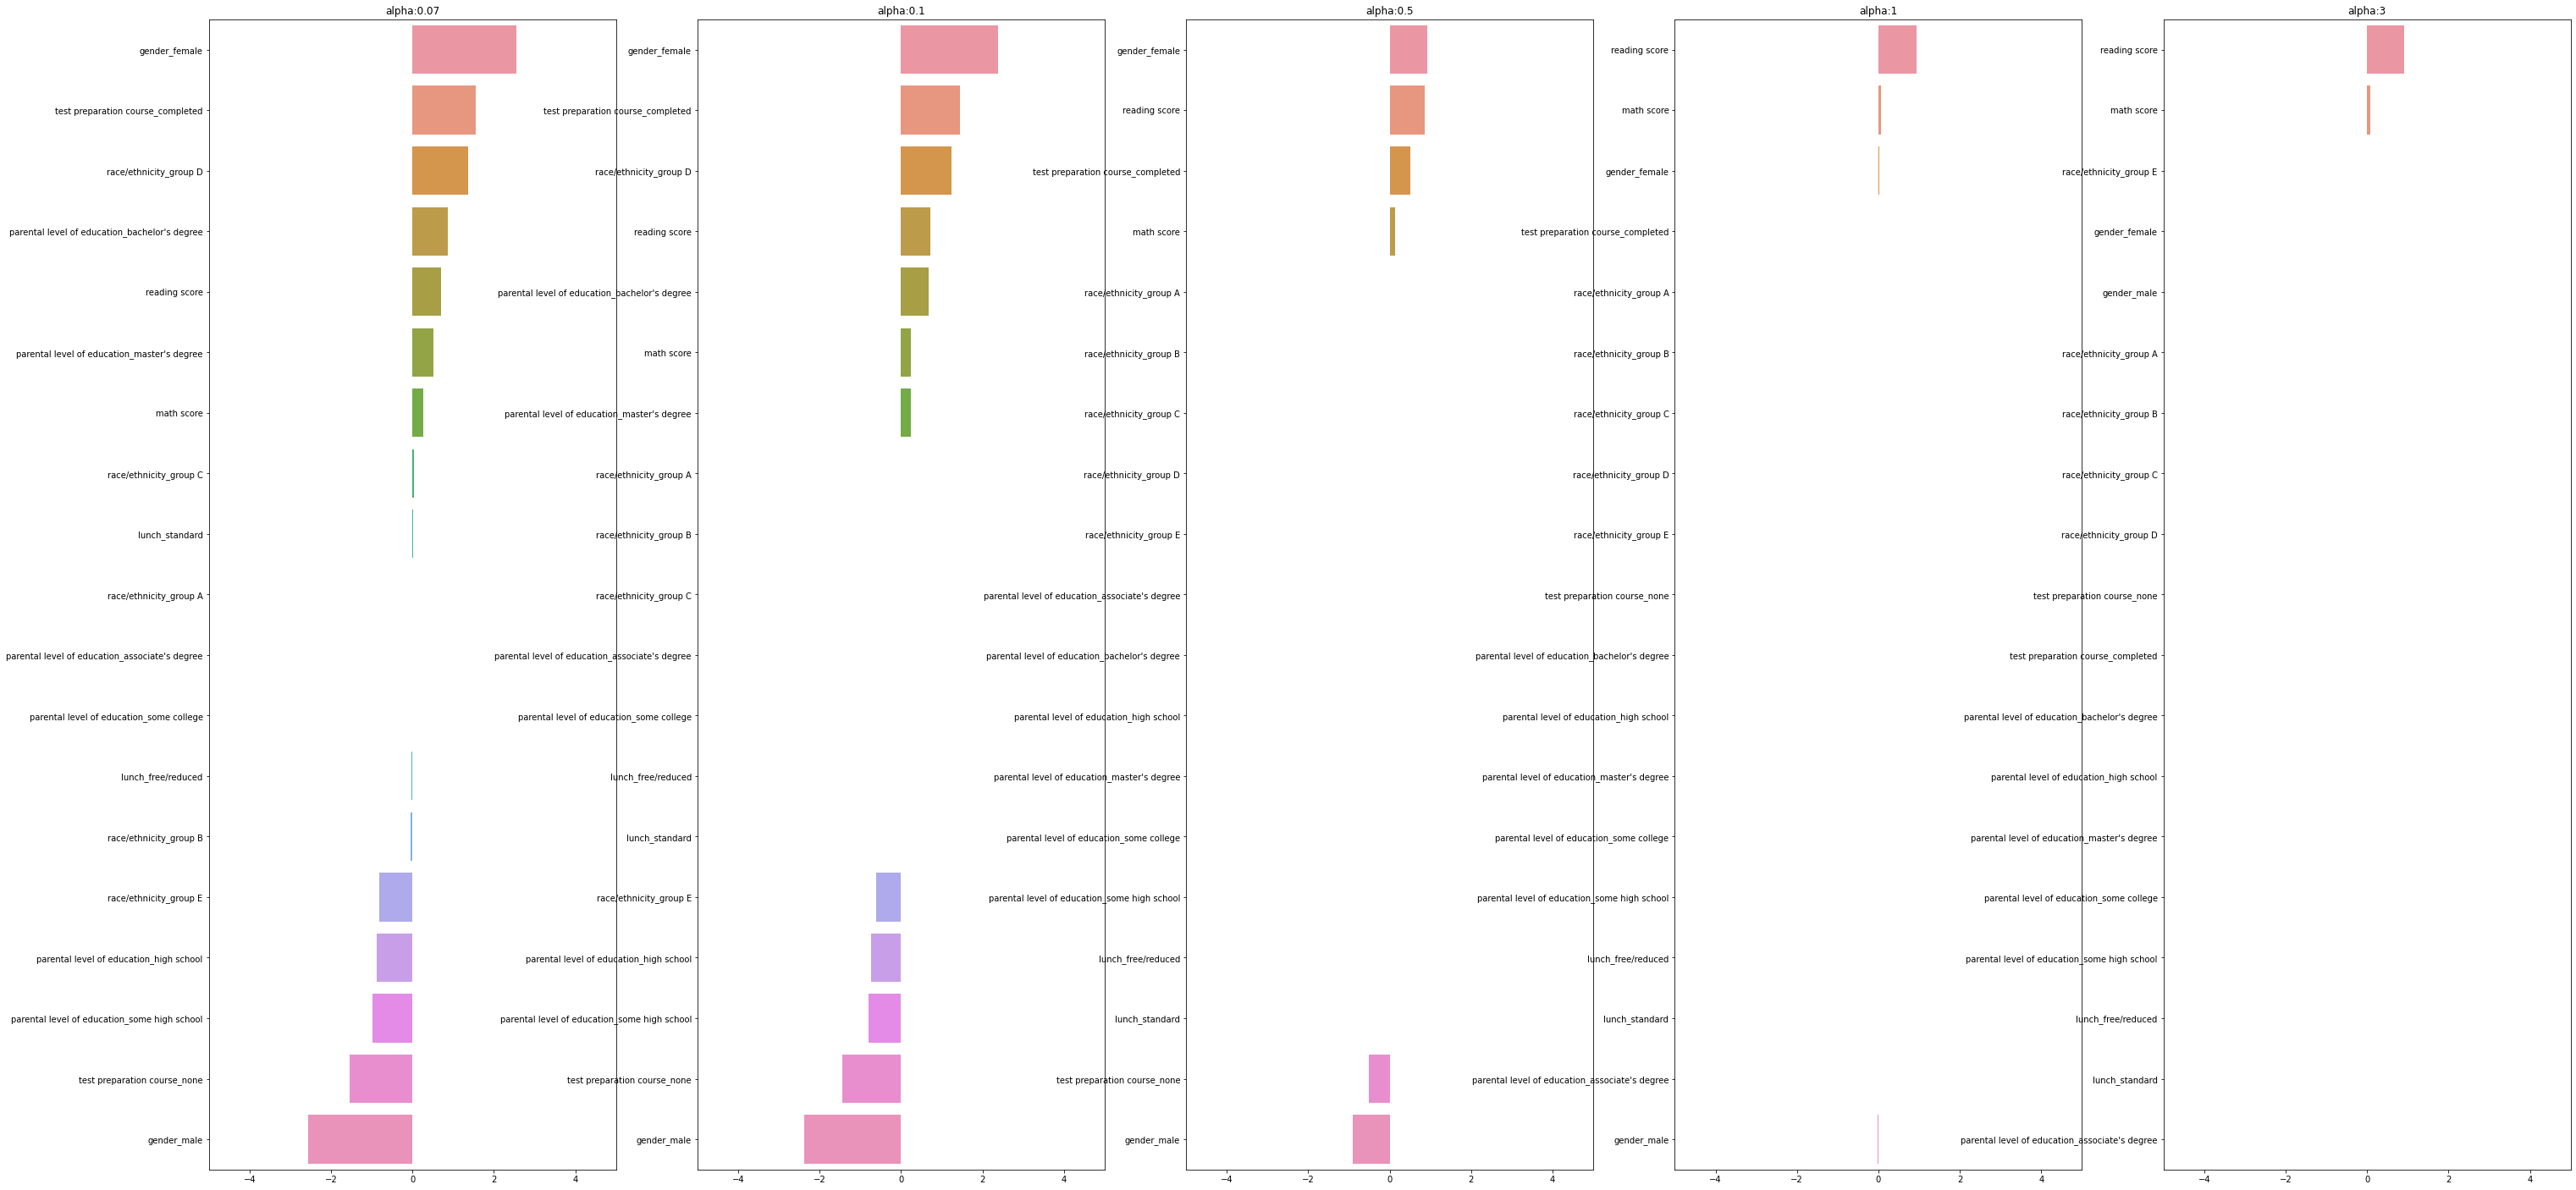

In [48]:
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성  
fig , axs = plt.subplots(figsize=(50,25) , nrows=1 , ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성  
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos , alpha in enumerate(alphas) :
    EN = ElasticNet(alpha = alpha, l1_ratio=0.7)
    EN.fit(x_data , y_target)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.  
    coeff = pd.Series(data=EN.coef_ , index=x_data.columns )
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-5,5)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

In [49]:
## alpha 값에 따른 컬럼별 회귀계수 출력
sort_column = "alpha:"+str(alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
gender_female,2.553405,2.382244,0.912946,0.026726,0.000000
test preparation course_completed,1.548146,1.442916,0.515024,0.000000,0.000000
race/ethnicity_group D,1.363670,1.230521,0.000000,0.000000,0.000000
parental level of education_bachelor's degree,0.873803,0.683310,0.000000,0.000000,0.000000
reading score,0.695326,0.713389,0.852111,0.928625,0.919160
parental level of education_master's degree,0.525521,0.241592,0.000000,0.000000,0.000000
math score,0.262159,0.248181,0.136283,0.070500,0.071399
race/ethnicity_group C,0.046994,0.000000,-0.000000,-0.000000,-0.000000
lunch_standard,0.018768,0.000000,0.000000,0.000000,0.000000
parental level of education_some college,0.000000,0.000000,0.000000,0.000000,0.000000
